# Predicting the Perfect Ratio of Red Wine Ingredients with Machine Learning Algorithms.



## Description
 The objective of the dataset is to analyze the quality of red and white variants of the Portuguese "Vinho Verde" wine. The datasets consists of certain input variables(based on physicochemical tests) and one target variable, quality -score between 0 and 10(based on sensory data).

## Goal
1. Explore with various Regression Models & see which yields the greatest accuracy.
2. Examine trends & correlations within our data
3.  Determine which features are important in high quality Red Wine


## Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Amina\OneDrive\Desktop\projects\ML projects\winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Descriptive statistics
Our data has only 1 type of data: Continuous (#): which is quantitative data that can be measured.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean quality was 5.6, with its Max (best quality score) being 8.0 & its Min (worst quality score) being 3.0. Now let's see if we have any missing values we need to take care of.

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.shape

(1599, 12)

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Luckily we dont have any missing values to work with so our data is ready for some visualization part.

## Visualization

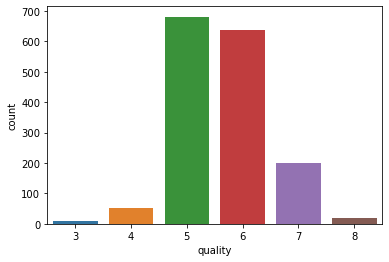

In [11]:
import seaborn as sns
sns.countplot(x = 'quality',data = df)

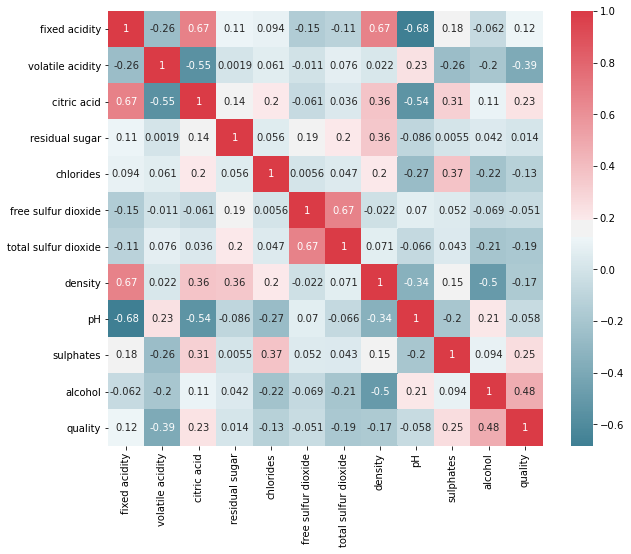

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Correlation Matrix aka Heat Maps helps us to you see correlations between all variables.We can see whether something is positively or negatively correlated with our predictor (target).

We can see there is a strong positive correlation between alcohol & our predictor. In fact, this is the most correlated feature in our data set, with a value of 0.48!.Since alcohol feature was the percent alcohol content in a drink. This makes sense that a higher percent of alcohol content would yield a greater satisfaction for a customer purchasing red wine!

Next, we can see the second strongest positive correlation, 0.25, between Sulphates & our quality predictor. It seems that people rate the quality higher when an additive (SO²) is contributed to the drink. Sulphates acts as an antimicrobial.

Lastly, the strongest negative correlation is the volatile acidity, with a correlation of -0.39! This is as expected because too high acetic acid levels can lead to an unpleasant, vinegar taste!


## Data pre-processing

In [13]:
new_df=df.replace(0,np.NaN)

In [14]:
new_df.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [15]:
new_df["citric acid"].fillna(new_df["citric acid"].mean(), inplace = True)

In [16]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.900000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.520000,0.640000,1.58000
citric acid,1599.0,0.295358,0.177021,0.01000,0.1500,0.295358,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.200000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.079000,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.000000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.000000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.996750,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.310000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.620000,0.730000,2.00000


In [17]:
# converting the response variables(3-7) as binary response variables that is either good or bad

names = ['bad', 'good']
bins = (2, 6.5, 8)

df['quality'] = pd.cut(df['quality'], bins = bins, labels = names)



In [18]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [21]:
#We have now labelled the quality into good and bad,now to convert them into numerical values

from sklearn.preprocessing import LabelEncoder
label_quality=LabelEncoder()
df['quality']= label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

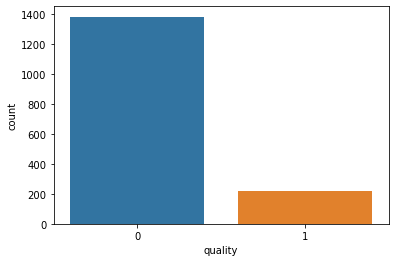

In [22]:
sns.countplot(df['quality'])

## Feature engineering


In [89]:
#FeatureSelection
X=df.iloc[:,:11].values
y=df.iloc[:,11].values
#splitting X and y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.20, random_state = 44 )

In [90]:
#Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [91]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## Model Building

In [101]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 44)
logreg.fit(X_train, y_train)



LogisticRegression(random_state=44)

In [102]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 44)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=44)

In [103]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [104]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 44)
dectree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=44)

In [105]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 44)
ranfor.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=44)

In [107]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
#Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

## Model Evaluation

In [109]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
#accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [110]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
#print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 88.125
Support Vector Classifier: 87.1875
Naive Bayes: 82.5
Decision tree: 83.4375
Random Forest: 89.6875


Random forest gives the best accuracy score

In [111]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_ranfor)
cm

array([[267,  12],
       [ 21,  20]], dtype=int64)

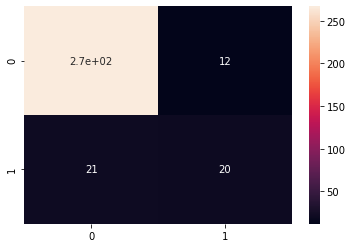

In [112]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [113]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       279
           1       0.62      0.49      0.55        41

    accuracy                           0.90       320
   macro avg       0.78      0.72      0.74       320
weighted avg       0.89      0.90      0.89       320

